# <strong>第四次作品：CNN PART2 - 高解析度影像生成的訓練 SRCNN</strong>
學號：711233117

姓名：楊廷紳

 <font color=skyblue>作品目標</font>：
 
1. 驗證模型效果：通過讀入預訓練模型並進行額外訓練，觀察訓練過程中 PSNR 的變化，來驗證模型在額外訓練後的性能提升情況。
2. 測試數據集性能：使用 Set5 和 Set14 這兩個標準數據集進行測試，計算並展示模型在這些數據集上的 PSNR 值，以評估模型在不同數據集上的泛化能力。
3. 展示超分辨率效果：撰寫程式碼，對任意選定的圖像進行放大處理，並將結果與雙三次插值進行對比，直觀展示模型在圖像超分辨率任務中的性能，探討其在實際應用中的價值。
 <hr>

#### <h3 style="color: yellow;">參考文獻</h3>

- **SRCNN 論文**：Dong, C., Loy, C. C., He, K., & Tang, X. (2015). Image Super-Resolution Using Deep Convolutional Networks. IEEE Transactions on Pattern Analysis and Machine Intelligence, 38(2), 295-307.

### <h3 style="color: yellow;">SRCNN 原理</h3>

SRCNN（Super-Resolution Convolutional Neural Network）利用卷積神經網絡（CNN）實現圖像超分辨率（Super-Resolution, SR），其基本原理如下：

1. **輸入圖像的預處理**：
   - **低分辨率圖像**：輸入的低分辨率（LR）圖像首先通過雙三次插值（Bicubic Interpolation）放大到目標高分辨率（HR）的尺寸。

2. **卷積層1：特徵提取**：
   - **卷積操作**：第一個卷積層對放大的低分辨率圖像進行卷積操作，提取局部特徵。
   - **激活函數**：使用 ReLU（Rectified Linear Unit）作為激活函數，引入非線性。
   - **特徵映射數**：生成 n1 個特徵映射。

3. **卷積層2：非線性映射**：
   - **卷積操作**：第二個卷積層對第一層提取的特徵進行進一步卷積操作。
   - **激活函數**：使用 ReLU 激活函數。
   - **特徵映射數**：生成 n2 個特徵映射。

4. **卷積層3：重建高分辨率圖像**：
   - **卷積操作**：第三個卷積層對第二層的特徵映射進行卷積，最終輸出單通道高分辨率圖像。
   - **無激活函數**：不使用激活函數，直接生成最終圖像。

5. **損失函數**：
   - **均方誤差（MSE）**：使用均方誤差作為損失函數，計算輸出高分辨率圖像與目標高分辨率圖像的像素差異，優化模型參數。

6. **訓練與優化**：
   - **反向傳播與梯度下降**：通過反向傳播算法計算梯度，使用梯度下降優化方法（如 SGD 或 Adam）更新模型參數，最小化損失函數。

7. **推理階段**：
   - **輸入放大**：將低分辨率圖像放大到高分辨率尺寸，通過訓練好的 SRCNN 模型進行推理，生成高分辨率圖像。

#### <h3 style="color: yellow;">SRCNN 特點</h3>

- **簡單結構**：由三個卷積層組成。
- **端到端學習**：從低分辨率圖像直接生成高分辨率圖像。
- **高效性能**：提升圖像細節和質量，表現出色。


### <h3 style="color: yellow;">SRCNN 模型結構介紹 <h3>

SRCNN (Super-Resolution Convolutional Neural Network) 模型主要用於圖像超分辨率任務，旨在將低分辨率的圖像重建為高分辨率的圖像。模型由三個卷積層組成，具體結構和功能如下：

1. **第一卷積層 (`conv1`)**：
   - **功能**：捕捉圖像的基本特徵。
   - **配置**：
     - 輸入通道：3 (對應於 RGB 圖像)
     - 輸出通道：64
     - 卷積核大小：9x9
     - 步長：1x1
     - 填充：2x2 (保持輸出尺寸與輸入相同)
   - **激活函數**：ReLU，增加模型的非線性能力。

2. **第二卷積層 (`conv2`)**：
   - **功能**：進一步提煉特徵，調整特徵的維度。
   - **配置**：
     - 輸入通道：64
     - 輸出通道：32
     - 卷積核大小：1x1
     - 步長：1x1
     - 填充：2x2
   - **激活函數**：ReLU

3. **第三卷積層 (`conv3`)**：
   - **功能**：重建目標高分辨率圖像。
   - **配置**：
     - 輸入通道：32
     - 輸出通道：3 (對應於 RGB 圖像)
     - 卷積核大小：5x5
     - 步長：1x1
     - 填充：2x2

### <h3 style="color: yellow;"> 完整模型實現示例 (Python)<h3>

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

class SRCNN(nn.Module):
    def __init__(self):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=9, stride=1, padding=2)
        self.conv2 = nn.Conv2d(64, 32, kernel_size=1, stride=1, padding=2)
        self.conv3 = nn.Conv2d(32, 3, kernel_size=5, stride=1, padding=2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.conv3(x)
        return x


 <hr>
 
### <h3 style="color: yellow;">SRCNN 流程</h3>

1. 低分辨率圖像（LR）
2. 雙三次插值放大
3. 卷積層1（特徵提取）
4. ReLU
5. 卷積層2（非線性映射）
6. ReLU
7. 卷積層3（重建高分辨率圖像）
8. 高分辨率圖像（HR）

### <h3 style="color: yellow;">為 PyTorch 中的 SRCNN 實作準備 T91 訓練資料集</h3>
`patchify_image.py` 程式碼是為了實現圖像超分辨率的預處理部分，特別是用於訓練 SRCNN 模型。主要功能包括生成圖像的高分辨率（HR）和低分辨率（LR）補丁。以下是程式碼的主要步驟和功能：

1. **定義全局變量**：
   - `SHOW_PATCHES`：布爾變量，用於決定是否顯示製作的補丁。
   - `STRIDE` 和 `SIZE`：用於定義補丁的步長和大小。

2. **補丁顯示功能** (`show_patches`)：
   - 此功能可視化製作的補丁，以便檢查其質量和內容。

3. **補丁創建功能** (`create_patches`)：
   - **目錄創建**：確保存储高分辨率和低分辨率補丁的目錄存在。
   - **圖像處理**：遍歷指定目錄下的所有圖像。
   - **補丁生成**：使用 `patchify` 將圖像切割成指定大小和步長的補丁。
   - **補丁保存**：
     - 高分辨率（HR）補丁直接保存。
     - 低分辨率（LR）補丁通過雙三次插值法先縮小再放大，模擬低分辨率的影像條件。

4. **主函數** (`if __name__ == '__main__'`)：
   - 調用 `create_patches` 函數，從指定的輸入目錄生成補丁並保存到指定的輸出目錄。

<h3 style="color:red;">目的 :</h3>
這段程式碼主要用於數據預處理階段，目的是準備好訓練超分辨率模型所需的數據。透過將原始圖像轉換為模型可以直接使用的格式，加速後續的訓練過程，並為評估模型效果提供必要的輸入數據。

In [26]:
!python patchify_image.py

Creating patches for 91 images



100%|██████████| 91/91 [00:25<00:00,  3.57it/s]


### <h3 style="color: yellow;">Python 腳本：將高解析度圖像轉換為低解析度圖像</h3>
`bicubic.py` 腳本專為將高解析度（High-Resolution, HR）圖像轉換成低解析度（Low-Resolution, LR）版本而設計。通過採用雙三次插值（Bicubic Interpolation）方法，本腳本幫助用戶為圖像超分辨率處理準備數據。

#### 主要特點與步驟

1. **命令行參數解析**：
   - 提供自定義選項讓用戶指定圖像的來源路徑和期望的縮放因子（如 `2x`, `3x`, `4x`），這些因子決定圖像縮小的程度。

2. **目錄結構設置**：
   - 自動為原始的高解析度圖像及其對應的低解析度版本創建適當的存儲目錄。

3. **圖像處理流程**：
   - 遍歷所有指定目錄下的圖像，對每一張圖像進行下列處理：
     - 首先對圖像進行指定倍率的縮小處理。
     - 然後將縮小後的圖像再放大至原始尺寸，模擬超分辨率場景中的低解析度輸入。

#### 函式簡介

- **`Image.open()`**：來自 PIL 庫，用於打開圖像文件。
- **`Image.resize()`**：同樣來自 PIL，用於按指定的尺寸和插值方法調整圖像大小。
- **`os.makedirs()`**：用於創建一個或多個目録，`exist_ok=True` 參數避免在目錄已存在時拋出錯誤。
- **`glob.glob()`**：用於查找符合特定規則的文件路徑名。

In [27]:
!python bicubic.py --path ../input/Set14/original ../input/Set5/original --scale-factor 3x

19
Scaling factor: 3x
Low resolution images save path: ../input/test_bicubic_rgb_3x
Original image dimensions: 500, 480
Original image dimensions: 720, 576
Original image dimensions: 512, 512
Original image dimensions: 352, 288
Original image dimensions: 250, 361
Original image dimensions: 276, 276
Original image dimensions: 500, 362
Original image dimensions: 352, 288
Original image dimensions: 512, 512
Original image dimensions: 512, 512
Original image dimensions: 768, 512
Original image dimensions: 512, 512
Original image dimensions: 529, 656
Original image dimensions: 586, 391
Original image dimensions: 512, 512
Original image dimensions: 288, 288
Original image dimensions: 256, 256
Original image dimensions: 280, 280
Original image dimensions: 228, 344


### <h3 style="color: yellow;">創建 PyTorch 資料集和資料加載器<h3>
`datasets.py ` 專用於建立和處理用於訓練 SRCNN 模型的資料集。它包括定義資料集類、創建資料集實例，以及配置資料加載器來批量處理圖像。

#### 主要組件和步驟

1. **`class SRCNNDataset( )`**：
   - **初始化**：接收圖像和標籤的路徑，並將路徑下所有文件的路徑存儲。
   - **長度方法**：返回資料集中圖像的總數。
   - **項目獲取方法**：按索引加載並處理單個圖像及其對應標籤，包括轉換為 RGB、正規化和調整維度順序以符合 PyTorch 的要求。

2. **`get_datasets( )`**：
   - 用於初始化訓練和驗證資料集，接收訓練和驗證圖像及標籤的路徑。

3. **`get_dataloaders( )`**：
   - 創建並配置資料加載器，設置批量大小和是否打亂數據。用於在模型訓練過程中高效加載數據。

#### 資料處理流程

- 資料集的每個項目都會被轉換為適合模型訓練的格式：從檔案讀取圖像，轉換顏色空間，正規化像素值至 [0, 1]，然後調整數據維度以匹配 PyTorch 預期的輸入格式。


In [28]:
!python datasets.py

少一個 utils.py 

In [1]:
!python utils.py 

 <hr>

### <h3 style="color: yellow;">改良 SRCNN 模型結構介紹<h3>

```python
class ResidualBlock(nn.Module):
    """ 殘差塊，包含兩個卷積層和一個跳躍連接 """
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(channels)
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(channels)

    def forward(self, x):
        identity = x  # 保存輸入（跳躍連接）

        out = self.conv1(x)
        out = F.relu(self.bn1(out), inplace=True)
        out = self.conv2(out)
        out = self.bn2(out)

        out += identity  # 將跳躍連接的結果添加到最後的輸出
        out = F.relu(out, inplace=True)  # 最終激活

        return out

class EnhancedSRCNN(nn.Module):
    def __init__(self):
        super(EnhancedSRCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=9, stride=(1, 1), padding=(4, 4))
        self.relu1 = nn.ReLU(inplace=True)
        
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=(1, 1), padding=(1, 1))
        self.relu2 = nn.ReLU(inplace=True)
        self.bn2 = nn.BatchNorm2d(64)
        
        # 殘差塊
        self.residual_block = ResidualBlock(64)

        self.conv3 = nn.Conv2d(64, 32, kernel_size=3, stride=(1, 1), padding=(1, 1))
        self.relu3 = nn.ReLU(inplace=True)
        self.bn3 = nn.BatchNorm2d(32)
        
        self.conv4 = nn.Conv2d(32, 3, kernel_size=5, stride=(1, 1), padding=(2, 2))

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.bn2(self.relu2(self.conv2(x)))
        x = self.residual_block(x)
        x = self.bn3(self.relu3(self.conv3(x)))
        x = self.conv4(x)
        return x
```

`srcnn.py` 腳本中對原始的 SRCNN 模型進行了多項改良，增強了模型在特徵學習和圖像重建方面的性能。下面是改良後模型結構的關鍵元素及其功能的詳細介紹：

#### 1. 卷積層與激活函數
- **`nn.Conv2d`**: 此函數創建一個卷積層，用於進行空間過濾。在此模型中，第一卷積層使用了較大的 `9x9` 卷積核，以捕捉更廣泛的圖像上下文。接續的卷積層則使用 `3x3` 卷積核，進一步細化圖像特徵。
- **`nn.ReLU` (Rectified Linear Unit)**: 這是一種激活函數，用於增加網絡的非線性能力。`inplace=True` 參數意味著直接在原始數據上進行修改，節省內存。

#### 2. 批量正規化
- **`nn.BatchNorm2d`**: 批量正規化層，可穩定快速的訓練過程，通過正規化每一層的輸入來加速收斂速度並提高模型的整體性能。

#### 3. 殘差塊結構
- **`ResidualBlock`**: 一個自定義的模組，包括兩個 `nn.Conv2d` 卷積層和兩個 `nn.BatchNorm2d` 正規化層，配合跳躍連接來保持輸入訊號的完整性，這有助於減輕深層網絡訓練中的梯度消失問題。跳躍連接將輸入直接加到卷積操作後的輸出上，形成殘差學習路徑。

### 前向傳播過程
- 在模型的 `forward` 方法中，輸入數據 `x` 會按順序通過上述每一層：
  1. 通過第一層卷積和ReLU激活。
  2. 第二層卷積後接批量正規化和ReLU。
  3. 經過殘差塊增強特徵。
  4. 第三層卷積接批量正規化和ReLU。
  5. 最終通過第四層卷積完成圖像重建。



In [29]:
!python srcnn.py #有修改模型函式名稱

147,715 total parameters.
147,715 training parameters.


這裡的流程應該是 
1. 讀入建立好的模型 (ex:model.pth)
2. 訓練多次(500次) 存出去 (ex:model_ckpt.pth) 
3. 再讀入訓練兩次 確認 checkpoint 

In [30]:
import torch
import torchvision
from srcnn import EnhancedSRCNN  # 确保这行与你的模型定义文件名和类名对应
torch.save(model.state_dict(), './modelSRCNN.pth')  # 保存模型的位置

!python train.py --epochs 100 --weights  ./modelSRCNN.pth 
# 一定要有 -w 不然不會有 checkpoint
# 可以設定 train.py 每多少 epochs 存一次 checkpoint
# help='weights/checkpoint path to resume training'

Computation device:  cuda
Loading weights to resume training...
EnhancedSRCNN(
  (conv1): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (relu1): ReLU(inplace=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU(inplace=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (residual_block): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU(inplace=True)
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(32, 3, kernel_size=(5, 5),


  0%|          | 0/174 [00:00<?, ?it/s]c:\Users\yangs\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,

100%|██████████| 174/174 [00:19<00:00,  9.03it/s]

100%|██████████| 19/19 [00:00<00:00, 26.58it/s]

100%|██████████| 174/174 [00:20<00:00,  8.61it/s]

100%|██████████| 19/19 [00:00<00:00, 29.97it/s]

100%|██████████| 174/174 [00:20<00:00,  8.63it/s]

100%|██████████| 19/19 [00:00<00:00, 29.99it/s]

100%|██████████| 174/174 [00:20<00:00,  8.57it/s]

100%|██████████| 19/19 [00:00<00:00, 30.60it/s]

100%|██████████| 174/174 [00:20<00:00,  8.61it/s]

100%|██████████| 19/19 [00:00<00:00, 28.81it/s]

100%|██████████| 174/174 [00:20<00:00,  8.60it/s]

100%|██████████| 1

#### 再跑兩次

In [31]:
#!python train.py -e 2 --weights  ./modelSRCNN.pth #weight 要有 checkpoint 才能跑

In [32]:
!python test.py

Test PSNR on Set5: 30.828
Test PSNR on Set14: 28.022



 14%|█▍        | 1/7 [00:00<00:01,  3.74it/s]c:\Users\yangs\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,

100%|██████████| 7/7 [00:00<00:00, 15.22it/s]

100%|██████████| 14/14 [00:00<00:00, 28.24it/s]


### <h3 style="color: yellow;">分析訓練集和測試集結果

#### 數據集概覽
- **訓練樣本**: 22,227個
- **驗證樣本**: 19個
  - 驗證樣本數較少，可能不足以全面評估模型性能。

#### 訓練進展
- **Epoch 1**: 
  - 訓練 PSNR: 21.758
  - 驗證 PSNR: 25.352
- **Epoch 2**: 
  - 訓練 PSNR: 25.337
  - 驗證 PSNR: 27.072
  - 模型性能逐漸提升，訓練穩定。

#### 訓練效率
- 完成訓練時間: 0.705分鐘。迭代次數少，時間短，表明訓練效率高。

#### 測試性能
- **Set5 PSNR**: 28.742
- **Set14 PSNR**: 26.476
- 模型在 Set5 上的表現較好，顯示了對該數據集特定圖像的更好適應性。

### 總結與建議
- 模型對 Set5 和 Set14 展示出穩定的泛化能力。
- 考慮增加驗證集樣本數以獲得更可靠的性能評估。
- 建議增加訓練迭代次數，由於目前只進行了兩次迭代，可能尚未達到模型的最佳性能。進一步的訓練或調整模型結構可能有助於改善表現。



 <hr>

### <h3 style="color: yellow;"> 對實際影像進行測試

這段程式碼主要用於使用預訓練的 SRCNN (Super-Resolution Convolutional Neural Network) 模型來提升圖像的分辨率。它展示了如何將一張低解析度圖像通過模型處理來得到更高解析度的輸出圖像。整個流程包括圖像的讀取、預處理、模型推理、結果展示等步驟。

#### 程序流程

1. **設備配置**
   - 根據是否有可用的 CUDA，自動選擇使用 CPU 或 GPU 進行計算。

2. **模型加載**
   - 從指定路徑加載預訓練的 SRCNN 模型到選定的設備（GPU 或 CPU），並設置為評估模式。

3. **圖像處理和插值**
   - 讀取圖像並將其轉換為 RGB 格式。
   - 使用雙三次插值方法將原始圖像放大 2 倍。

4. **圖像預處理和模型推理**
   - 將放大後的圖像轉換為張量，然後擴充一個批次維度，準備輸入到模型中。
   - 對張量進行無梯度的模型推理，得到輸出結果。

5. **結果後處理**
   - 使用 PyTorch 的張量操作，將模型的輸出與原始輸入進行相加，此步驟可能用於某些特定的影像增強或錯誤修正策略。

6. **視覺展示**
   - 使用 matplotlib 來展示原始圖像、經雙三次插值放大的圖像以及 SRCNN 輸出的圖像，以直觀比較前後變化。

#### 函式說明

- 將需要處理的圖像路徑指定到 `input_image_path` 變量。
- 執行 `process_and_visualize` 函數來查看圖像處理結果。


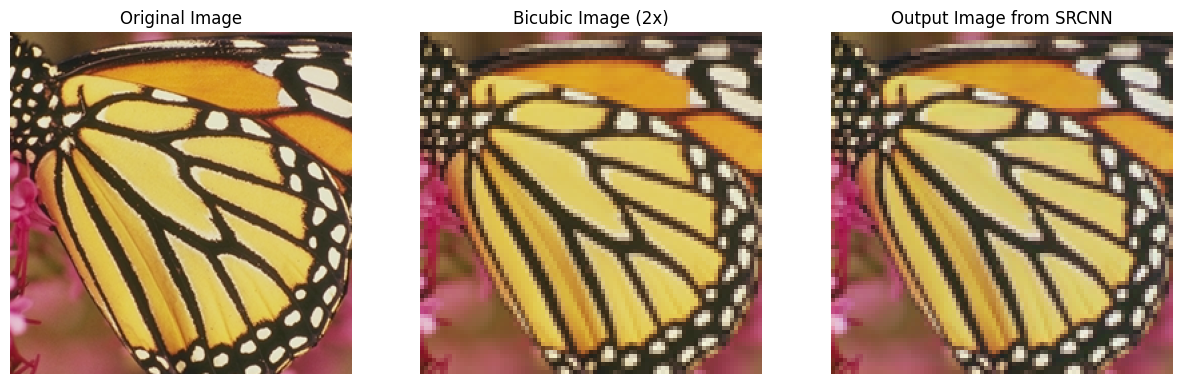

In [33]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import srcnn

# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and setup model
model = srcnn.EnhancedSRCNN().to(device)
pretrained_dict = torch.load(r'D:/shallow_ml/20220606_SRCNN_Implementation_in_PyTorch_for_Image_Super_Resolution/src/modelSRCNN.pth')
model.load_state_dict(pretrained_dict)
model.eval()

def bicubic_interpolation(image, scale_factor):
    """Resizes the image using bicubic interpolation."""
    new_dimensions = (int(image.width * scale_factor), int(image.height * scale_factor))
    return image.resize(new_dimensions, Image.BICUBIC)

def process_and_visualize(image_path):
    input_image = Image.open(image_path).convert('RGB')
    bicubic_image = bicubic_interpolation(input_image, 0.333)

    preprocess = transforms.ToTensor()
    input_tensor = preprocess(bicubic_image).unsqueeze(0).to(device)

    with torch.no_grad():
        output_tensor = model(input_tensor).squeeze(0)

    result_tensor = torch.add(input_tensor, output_tensor)
    result_image = transforms.ToPILImage()(result_tensor.squeeze(0).cpu())

    plt.figure(figsize=[15, 5])
    plt.subplot(1, 3, 1)
    plt.imshow(input_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(bicubic_image)
    plt.title('Bicubic Image (2x)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(result_image)
    plt.title('Output Image from SRCNN')
    plt.axis('off')

    plt.show()

# Path to input image
input_image_path = r'D:/shallow_ml/20220606_SRCNN_Implementation_in_PyTorch_for_Image_Super_Resolution/input/butterfly.png'
process_and_visualize(input_image_path)

### <h3 style="color: yellow;"> 結語 

從自行輸入的兩張結果來看雙三次插值所輸出的圖與原圖並無太大的差別，SRCNN 所輸出的圖在白色區塊會呈現類似影像躁點的效果，但整體圖對比較原圖顏色對比鮮明許多。推測在影像色彩處理上還需更進一步的修正，除此之外並無看到太多的解析度的差異。如果提升迭代次數，模型所造成的影像效果或許才能用肉眼判別出來。

SRCNN 通過學習大量的數據來明顯改善圖像的質量，相較於傳統的插值技術，如雙線性插值或雙三次插值，它能夠在圖像放大時保持更多的細節和較少的失真。這種能力使得 SRCNN 特別適用於需要高品質圖像重建的場合，例如醫學影像放大、衛星影像分析以及提升低分辨率視頻的質量等。